## Homework

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from Kaggle.

You can get a wget-able version here:

wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

Note: You will need an environment with a GPU for this homework. We recommend to use Saturn Cloud. You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons.

The dataset contains separate folders for training and test sets.

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
    - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case
As optimizer use SGD with the following parameters:

- SGD(lr=0.002, momentum=0.8)
For clarification about kernel size and max pooling, check Office Hours.

In [1]:
import tensorflow as tf

2022-11-20 12:54:52.818376: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
!pip install wget
!python -m wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip

100% [..................................................] 109298562 / 109298562
Saved under dino-dragon (2).zip


In [4]:
!mkdir dino_dragon

In [5]:
!unzip dino-dragon.zip -d dino_dragon

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [7]:
test_dir = 'dino_dragon/test/'
train_dir = 'dino_dragon/train/'

## Model

In [8]:
#  use Convolutional Neural Network (CNN)
model = models.Sequential()

#The shape for input should be (150, 150, 3)
# convolutional layer (Conv2D)- 32 filters, kernel size (3, 3), relu for activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Reduce the size of the feature map with max pooling (MaxPooling2D)
# Set the pooling size to (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Turn the multi-dimensional result into vectors using a Flatten layer
model.add(layers.Flatten())

# add a Dense layer with 64 neurons and 'relu' activation
model.add(layers.Dense(64, activation='relu'))

# create the Dense layer with 1 neuron - this is the output
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-20 12:54:59.432700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 12:54:59.440105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 12:54:59.440719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 12:54:59.441649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

- binary crossentropy
- focal loss
- mean squared error
- categorical crossentropy

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

In [9]:
# as it's a binary classification,the loss function to use is binary_crossentropy
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

`Answer: binary crossentropy`

## Question 2

What's the total number of parameters of the model? You can use the summary method for that.

- 9215873
- 11215873
- 14215873
- 19215873

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

`Answer: 11215873`

## Data Generators
For the next two questions, use the following data generator for both train and test sets:

```
ImageDataGenerator(rescale=1./255)
```

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use`batch_size=20`
- Use `shuffle=True` for both training and test sets.

For training use .fit() with the following params:

```
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [11]:
# use data generator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# set class-mode parametr to "binary"
# use batch-size = 20
# Set shuffle = True
train_generator = (
    train_datagen
    .flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=20, 
        class_mode='binary',
        shuffle=True
    )
)

Found 1594 images belonging to 2 classes.


In [13]:
validation_generator = (
    val_datagen
    .flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=True
    )
)

Found 394 images belonging to 2 classes.


## Model fitting and Accuracy/Loss Evaluation

In [14]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


2022-11-20 12:55:01.898500: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-20 12:55:02.535830: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 12:55:02.536746: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 12:55:02.536783: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-20 12:55:02.537800: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 12:55:02.537882: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 12s 122ms/step - loss: 0.6702 - acc: 0.6010 - val_loss: 0.6583 - val_acc: 0.5305
Epoch 2/10
80/80 [==============================] - 8s 105ms/step - loss: 0.5467 - acc: 0.7440 - val_loss: 0.4860 - val_acc: 0.7640
Epoch 3/10
80/80 [==============================] - 8s 105ms/step - loss: 0.4475 - acc: 0.8118 - val_loss: 0.4106 - val_acc: 0.8198
Epoch 4/10
80/80 [==============================] - 9s 117ms/step - loss: 0.3919 - acc: 0.8375 - val_loss: 0.3696 - val_acc: 0.8452
Epoch 5/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3418 - acc: 0.8563 - val_loss: 0.3489 - val_acc: 0.8579
Epoch 6/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3302 - acc: 0.8626 - val_loss: 0.3325 - val_acc: 0.8503
Epoch 7/10
80/80 [==============================] - 8s 106ms/step - loss: 0.2833 - acc: 0.8839 - val_loss: 0.4091 - val_acc: 0.8046
Epoch 8/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2663 - acc

In [15]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [16]:
acc = hist.history['acc']
val_acc= hist.history['val_acc']
loss = hist.history['loss']
val_loss= hist.history['val_loss']

In [17]:
mean_acc = np.median(acc)

## Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20

Mean Acc 0.8594730198383331


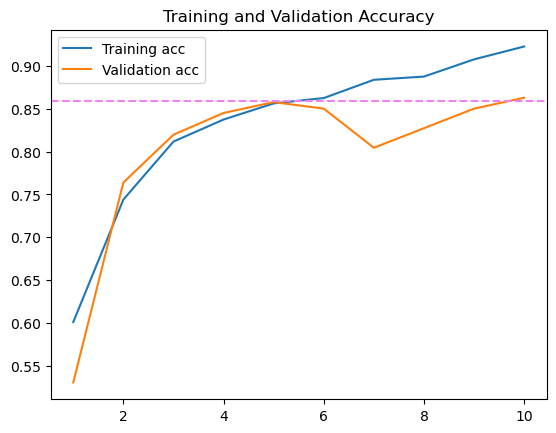

In [18]:
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.axhline(y=mean_acc, color='violet', linestyle='--')

plt.title('Training and Validation Accuracy')
plt.legend()
print('Mean Acc',mean_acc)

`Answer 0.9`

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

In [19]:
std_acc = np.std(loss)

Std acc 0.137889698864394


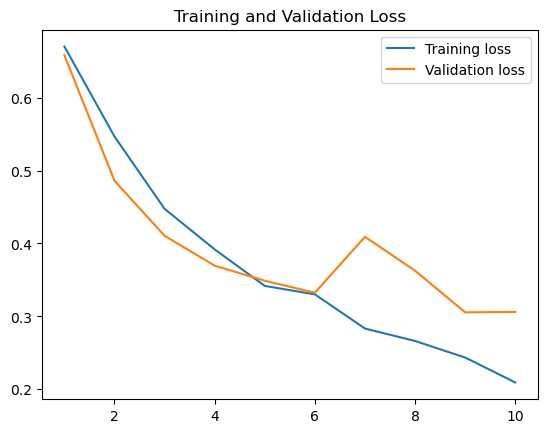

In [20]:
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and Validation Loss')
plt.legend()
print('Std acc',std_acc)

`Answer 0.11`

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- `rotation_range=40`,
- `width_shift_range=0.2`,
- `height_shift_range=0.2`,
- `shear_range=0.2`,
- `zoom_range=0.2`,
- `horizontal_flip=True`,
- `fill_mode='nearest'`

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = (
    train_datagen
    .flow_from_directory(
        train_dir, 
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )
)

Found 1594 images belonging to 2 classes.


In [24]:
validation_generator = (
    test_datagen
    .flow_from_directory(
        test_dir, 
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
    )
)

Found 394 images belonging to 2 classes.


## Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [ ]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
50/50 [==============================] - 15s 304ms/step - loss: 0.4292 - acc: 0.8130 - val_loss: 0.4882 - val_acc: 0.7843
Epoch 2/10
50/50 [==============================] - 15s 299ms/step - loss: 0.4352 - acc: 0.8043 - val_loss: 0.3091 - val_acc: 0.8680
Epoch 3/10
50/50 [==============================] - 15s 299ms/step - loss: 0.4107 - acc: 0.8149 - val_loss: 0.3986 - val_acc: 0.8147
Epoch 4/10
50/50 [==============================] - 15s 300ms/step - loss: 0.4006 - acc: 0.8256 - val_loss: 0.5188 - val_acc: 0.7665
Epoch 5/10
50/50 [==============================] - 15s 301ms/step - loss: 0.3931 - acc: 0.8325 - val_loss: 0.3806 - val_acc: 0.8249
Epoch 6/10
50/50 [==============================] - 15s 301ms/step - loss: 0.3984 - acc: 0.8231 - val_loss: 0.4890 - val_acc: 0.7817
Epoch 7/10
50/50 [==============================] - 15s 299ms/step - loss: 0.3810 - acc: 0.8300 - val_loss: 0.5614 - val_acc: 0.7614
Epoch 8/10
50/50 [==============================] - 15s 300ms/step - 

In [ ]:
acc = hist.history['acc']
val_acc= hist.history['val_acc']
loss = hist.history['loss']
val_loss= hist.history['val_loss']

In [ ]:
mean_val_loss = np.median(val_loss)

In [ ]:
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.legend()

In [ ]:
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.axhline(y=mean_val_loss, color='red', linestyle='--')

plt.title('Training and Validation Accuracy')
plt.legend()
print('Mean Val loss',mean_val_loss)

`Answer: 0.37`

## Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

In [ ]:
np.mean(val_acc[-5:])

`Answer 0.84`